In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons
from tqdm.notebook import tqdm

In [2]:
X1, y1 = make_circles(n_samples=1500, factor=0.5, noise=0.05, random_state=32)
X2, y2 = make_moons(n_samples=1500, noise=0.05, random_state=32)

In [3]:
colors = np.array(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00'])

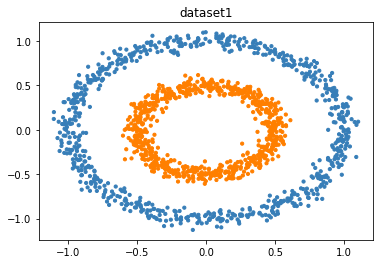

In [4]:
plt.title('dataset1')
plt.scatter(X1[:, 0], X1[:, 1], s=10, c = colors[y1])

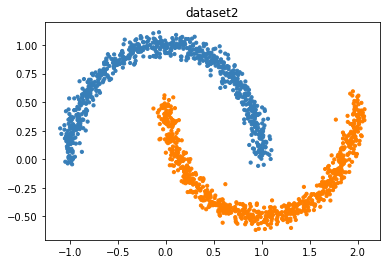

In [5]:
plt.title('dataset2')
plt.scatter(X2[:, 0], X2[:, 1], s=10, c=colors[y2])

In [6]:
class DBSCAN:
    def __init__(self, eps, minPts):
        self.eps = eps
        self.minPts = minPts
        
        self.clusters = [[]]
    def fit(self, X):
        
        visited = np.zeros(len(X))
        
        while len(np.where(visited == 0)[0]) is not 0:
            index = np.where(visited == 0)[0][0]
            
            visited[index] = 1
            
            point = X[index]
            
            region_point_indexes = self.region_query(point, X).tolist()  
            
            if len(region_point_indexes) >= self.minPts:
                cluster = [index]
                self.clusters.append(cluster)
                
                for region_point_index in region_point_indexes:
                    
                    if visited[region_point_index] == 0:
                        visited[region_point_index] = 1
                        
                        _rpis = self.region_query(X[region_point_index], X).tolist()
                        
                        if len(_rpis) >= self.minPts:
                            region_point_indexes += list(set(_rpis) - set(region_point_indexes))
        
                        exist = False 
                        for c in self.clusters:
                            if region_point_index in c:
                                exist = True
                                break
                        
                        if not exist:
                            self.clusters[-1].append(region_point_index)                    
            else:
                self.clusters[0].append(index)
            
    def region_query(self, point, X):
        if point.shape is not (1, X.shape[1]):
            point = point.reshape(1, X.shape[1])
        return np.where(self.euclidean_distance(point, X) <= self.eps)[0]
    
    def euclidean_distance(self, v1, v2):
        return np.sqrt(np.sum((v1-v2)**2, axis=1)) 

In [7]:
dbscan_1 = DBSCAN(eps=0.2, minPts=5)
dbscan_1.fit(X1)

In [8]:
len(dbscan_1.clusters)

3

In [9]:
dbscan_1.clusters

[[],
 [0,
  50,
  63,
  92,
  98,
  104,
  110,
  114,
  122,
  141,
  142,
  144,
  154,
  161,
  171,
  188,
  196,
  200,
  207,
  215,
  221,
  271,
  273,
  278,
  313,
  315,
  321,
  331,
  357,
  364,
  384,
  392,
  457,
  464,
  509,
  538,
  560,
  600,
  603,
  660,
  682,
  684,
  692,
  717,
  731,
  782,
  783,
  797,
  800,
  807,
  820,
  833,
  835,
  846,
  880,
  903,
  918,
  919,
  933,
  934,
  948,
  999,
  1041,
  1073,
  1095,
  1118,
  1124,
  1139,
  1191,
  1193,
  1226,
  1234,
  1248,
  1279,
  1297,
  1300,
  1303,
  1313,
  1327,
  1336,
  1353,
  1366,
  1387,
  1392,
  1396,
  1407,
  1421,
  1447,
  1455,
  1466,
  1474,
  641,
  1281,
  131,
  1028,
  897,
  391,
  1416,
  523,
  1293,
  1043,
  790,
  1310,
  1440,
  38,
  40,
  1449,
  1323,
  690,
  306,
  308,
  318,
  319,
  1345,
  961,
  1221,
  837,
  1096,
  587,
  1357,
  592,
  978,
  1109,
  1365,
  599,
  602,
  347,
  1371,
  739,
  1257,
  1258,
  1260,
  623,
  113,
  115,
  1140,
  

In [10]:
labels = []
for i in range(len(X1)):
    if i in dbscan_1.clusters[0]:
        labels.append(0)
    elif i in dbscan_1.clusters[1]:
        labels.append(1)
    else:
        labels.append(2)
len(labels)

1500

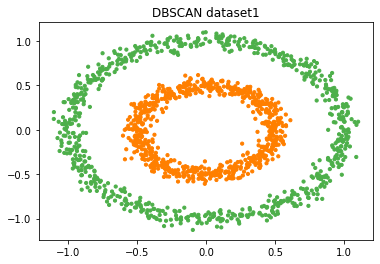

In [11]:
plt.title('DBSCAN dataset1')
plt.scatter(X1[:, 0], X1[:, 1], s=10, c=colors[labels])

In [12]:
dbscan_2 = DBSCAN(eps=0.2, minPts=5)
dbscan_2.fit(X2)

In [13]:
len(dbscan_2.clusters)

3

In [14]:
dbscan_2.clusters

[[],
 [0,
  50,
  51,
  63,
  98,
  104,
  110,
  114,
  120,
  122,
  141,
  142,
  144,
  153,
  154,
  161,
  171,
  196,
  200,
  207,
  215,
  246,
  271,
  308,
  315,
  321,
  331,
  347,
  364,
  384,
  392,
  445,
  457,
  509,
  523,
  538,
  560,
  600,
  603,
  660,
  682,
  684,
  692,
  717,
  731,
  766,
  782,
  797,
  807,
  820,
  833,
  835,
  839,
  846,
  858,
  880,
  903,
  918,
  919,
  933,
  934,
  937,
  948,
  999,
  1041,
  1043,
  1073,
  1095,
  1118,
  1124,
  1139,
  1191,
  1193,
  1226,
  1234,
  1248,
  1258,
  1279,
  1281,
  1313,
  1327,
  1336,
  1353,
  1366,
  1371,
  1387,
  1392,
  1396,
  1407,
  1421,
  1447,
  1449,
  1455,
  1474,
  641,
  897,
  131,
  1028,
  391,
  1416,
  1293,
  1300,
  790,
  1303,
  29,
  1310,
  543,
  1440,
  417,
  38,
  40,
  1323,
  690,
  306,
  313,
  188,
  318,
  319,
  1345,
  961,
  1221,
  837,
  1096,
  587,
  1489,
  978,
  1109,
  1365,
  599,
  602,
  221,
  739,
  1257,
  1260,
  623,
  113,
  115,

In [15]:
labels = []
for i in range(len(X2)):
    if i in dbscan_2.clusters[0]:
        labels.append(0)
    elif i in dbscan_2.clusters[1]:
        labels.append(1)
    else:
        labels.append(2)
len(labels)

1500

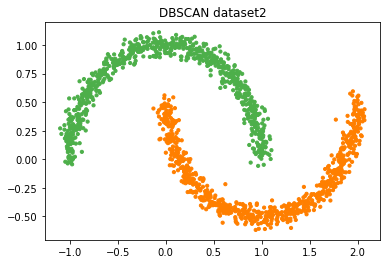

In [16]:
plt.title('DBSCAN dataset2')
plt.scatter(X2[:, 0], X2[:, 1], s=10, c=colors[labels])